# odds and addend
- odds = 승산
- addend = 가수, 또는 더함수

이번 장에서는 오즈와 베이즈 정리의 새로운 형태인 베이즈 규칙에 대해 설명할 것이다. 머릿속이나 종이로 베이지안 갱신을 해야할 때, 베이즈 규칙을 사용하면 편한다. 베이즈 규칙을 사용하면 __증거__ 에 대한 중요한 아이디어가 떠오를 수도 있고, 증거의 중요 정도를 측정할 수도 있다. 

이어 addend에 대해서 다룰 것이다. 더해지는 수량에 대해 살펴보고, 이에 대한 분포를 어떻게 구하는지 알아본다. 합, 차, 곱에 따른 연산에 대한 분포를 계산하는 함수도 정의해보자. 그리고 이런 분포를 베이지안 갱신에 사용해보자.

단, 그 전에 가벼운 연습문제를 통해 지금까지의 공부를 되돌아보자.

### 연습문제 1.

- 당신의 카드뭉치는 총 20장이다. 이 안에는 폭탄 카드가 두 장 들어있다. 카드를 두 번 뽑았는데, 모두 폭탄이 아니었다. 당신은 몇번째 카드에서 첫번째 폭탄을 뽑을까? (카드 x에서 조커가 나올 확률은 얼마일까?)

In [1]:
import numpy as np
import pandas as pd
from empiricaldist import Pmf

In [2]:
# 가설 = ?

# prior = ?

# likelihood = ?

# posterior 


#### 베이즈 테이블을 사용한 방법

In [3]:
card = pd.DataFrame(index = np.arange(1,21))
card['prior'] = 0.05
card['likelihood'] = 0.0  # 일단 모두 0으로 초기화

# 첫 번째 카드를 뽑을 때 likelihood
card['likelihood'][1] = 2 / 20

# 두 번째 이후의 likelihood 계산
for i in range(2, 21):
    card['likelihood'][i] = 2 / i if 2 / i <= 1 else 1

# posterior 계산
card['unnorm'] = card['prior'] * card['likelihood']

# 정규화 (posterior의 합을 1로 만들기)
card['posterior'] = card['unnorm']/card['unnorm'].sum()

print(card)

    prior  likelihood    unnorm  posterior
1    0.05    0.100000  0.005000   0.018884
2    0.05    1.000000  0.050000   0.188840
3    0.05    0.666667  0.033333   0.125894
4    0.05    0.500000  0.025000   0.094420
5    0.05    0.400000  0.020000   0.075536
6    0.05    0.333333  0.016667   0.062947
7    0.05    0.285714  0.014286   0.053954
8    0.05    0.250000  0.012500   0.047210
9    0.05    0.222222  0.011111   0.041965
10   0.05    0.200000  0.010000   0.037768
11   0.05    0.181818  0.009091   0.034335
12   0.05    0.166667  0.008333   0.031473
13   0.05    0.153846  0.007692   0.029052
14   0.05    0.142857  0.007143   0.026977
15   0.05    0.133333  0.006667   0.025179
16   0.05    0.125000  0.006250   0.023605
17   0.05    0.117647  0.005882   0.022217
18   0.05    0.111111  0.005556   0.020982
19   0.05    0.105263  0.005263   0.019878
20   0.05    0.100000  0.005000   0.018884


In [4]:
# 가능한 수와 이에 대한 확률에 대해 분포의 평균값
np.sum(card.index * card['posterior'])

7.1948161325463085

#### 확률분포를 이용한 방법

In [5]:
from scipy.stats import binom
from empiricaldist import Pmf

def make_binomial(n,p):
    """이항 Pmf를 생성"""
    ks =np.arange(n+1)
    ps = binom.pmf(ks,n,p) # 확률변수 0~ n 까지의 이항확률값
    return Pmf(ps,ks)

<Axes: >

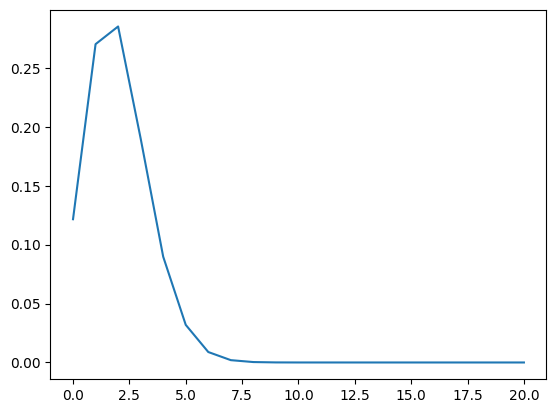

In [6]:
dist_bomb = make_binomial(20,0.1) 
dist_bomb.plot()

## 6.1 odds

확률을 나타내는 한 가지 방법은 0과 1 사이의 숫자로 나타내는 방법이지만, 이것이 유일한 방법은 아니다. odds는 이 사건이 일어날 확률 대 일어나지 않았을 확률의 비율이다. 

$$ odds = \frac{p}{1-p}$$

예를 들어, 우리 팀 승률이 75%라면 이길 가능성이 질 가능성의 3배이므로 승산(odds)는 3:1 이다.

In [7]:
def odds(p):
    return p/(1-p)

In [8]:
odds(0.75)

3.0

확률이 낮은 경우, 승산 대신 반대 형식의 승산으로 나타내는 경우도 많다. 

예를 들어, 경마에서 내가 건 말의 승률이 10%라면 보통 승산은 1:9 이다. 
하지만 반대의 경우 승산은 9:1 이다.

In [9]:
odds(0.1)

0.11111111111111112

In [10]:
odds(0.9)

9.000000000000002

주어진 승산을 소수점 형태로 바꾸면, 다음과 같이 확률로 나타낼 수 있다.

In [11]:
def prob(o):
    """ 
    odds = p/(1-p)
    p = o * (1-p) = o - op 
    p + op = o
    p(1+o) = o
    p = o/(1+o)
    """
    return o/(o+1)


예를 들어 오즈가 3/2 라면, 이에 대응하는 확률은 3/5 이다.

In [12]:
prob(1.5)

0.6

In [13]:
prob(1)

0.5

확률과 오즈는 동일한 정보를 다르게 표현한다. 이중 하나가 주어진다면 다른 형태도 구할 수 있다. 하지만 어떤 계산은 오즈를 사용할 때 더 편하다. 이는 나중에 살펴보자.

## 베이즈 규칙

- 베이즈 정리를 '확률 형태'로 나타내면 다음과 같다.
$$ P(H|D) = \frac{P(H)*P(D|H)}{P(D)}$$
- 승산 A를 odds(A) 로 나타낸다면, 다음과 같이 표시할 수 있다.
$$ odds(A|D) = odds(A) * \frac{P(D|A)}{P(D|B)} $$
- 이 식은 베이즈 규칙으로 사후 오즈는 사전 오즈와 우도비의 곱이 된다. 베이즈 규칙은 종이나 머릿속으로 베이지안 갱신을 실행할 때 매우 편리하다. 예를 들어, 쿠키 문제를 다시 보자.
```
쿠키 그릇이 두 개 있다고 가정해보자. 첫번째 그릇에는 바닐라 쿠키 30개와 초콜릿 쿠키 10개가 들어있다. 두번째 그릇에는 바닐라 쿠키와 초콜릿 쿠키가 20개씩 들어있다.
어떤 그릇인지 확인하지 않고 임의로 그릇을 골라, 쿠키를 하나 집었다고 하자. 집은 쿠키가 바닐라 쿠키였다면, 이 바닐라 쿠키가 1번 그릇에서 나왔을 확률은 얼마일까?
```


사전확률이 0.5 이므로, 사전오즈는 1이다. 이 때 가능도는 $\frac{(3/4)}{(1/2)}$ 이다. 그러므로 사후오즈는 3/2이고, 이는 확률 3/5에 해당한다.

In [14]:
prior_odds = 1
likelihood_ratio = (3/4) / (1/2)
post_odds = prior_odds * likelihood_ratio
print(f'post odds:{post_odds}, post prob:{prob(post_odds)}')

post odds:1.5, post prob:0.6


여기서 다른 쿠키를 뽑고, 이 쿠키가 초콜릿 쿠키였다면 새로 갱신을 할 수 있다.

In [15]:
likelihood_ratio = (1/4)/(1/2) # 초코쿠키 우도비
post_odds *= likelihood_ratio
print(f'post odds:{post_odds}, post prob:{prob(post_odds)}')

post odds:0.75, post prob:0.42857142857142855


## 6.3 올리버의 혈액형

베이즈 규칙을 사용해서 문제를 풀어보자. 

```
범죄현장에서 두 사람의 혈흔을 발견했다. 용의자 올리버는 혈액형 검사 결과 O로 나왔다. 두 혈흔의 혈액형은 O형(지역 인구 중 60%)과 AB형(1% 빈도로 나타나는 혈액형)으로 나타났다. 
이 범죄현장의 혈흔 데이터가 올리버가 현장에 혈흔을 남긴 범인 중 하나라는 질문에 대한 증거가 될 수 있을까?
```

- 이 질문에 대답하려면, 데이터가 가설에 부합하는(혹은 반하는) 증거를 보여줄 수 있는지 생각해야 한다. 직관적으로, 가설에 데이터를 반영했을 때 그 전보다 부합한다면 데이터가 가설에 적합하다고 할 수 있다.

- 쿠키 문제에서 사전오즈는 1이고, 확률은 50%다. 사후 오즈는 3/2로, 확률로는 60%다. 따라서 바닐라 쿠키는 그릇 1에서 나왔다는 것에 대한 증거가 된다. 

- 베이즈 규칙은 이런 직관을 보다 정확하게 만드는 방법을 보여준다. 다시 한번 베이즈 규칙을 보자.
$$ odds(A|D) = odds(A)*\frac{P(D|A)}{P(D|B)}$$

이를 odds(A) 로 나누면 다음과 같은 식이 나온다.
$$ \frac{odds(A|D)}{odds(A)} = \frac{P(D|A)}{P(D|B)}$$

- __좌측항은 사후 오즈와 사전오즈의 비다. 우측항은 우도비로, 베이즈 요인(bayes factor)__ 이라고 한다. 
- 베이즈 요인이 1보다 크면, 데이터는 B의 가정보다 A의 가정 하에 존재하는 게 더 가깝다는 뜻이다. 또한 데이터를 반영한 후 전보다 승산이 커졌음을 의미한다. 
- 베이즈 요인이 1보다 작다면, 데이터가 A의 가정보다는 B의 가정하에 존재할 확률이 더 높다는 뜻이다. 따라서 A의 승산은 낮아진다. 
- 그럼 이 내용을 문제에 적용해보자. 만약 올리버가 범죄 현장에 혈흔을 남긴 사람 중 한 명이라면, 올리버는 O형 샘플로 계산된다. 이 경우, 데이터의 확률은 임의의 사람이 1%인 AB형일 확률이다. 
- 올리버가 현장에 혈흔을 남기지 않았다면 설명해야 할 샘플이 두 개가 된다. 전체 인구에서 임의로 두 사람의 혈액형을 검사했을 때, 한 사람이 O형이고 다른 한 사람이 AB형일 확률은 얼마인가?
- 이 경우는 두 가지가 있을 수 있다. 첫번째 사람이 O형이거나, 두번째 사람이 O형이거나.
- 각 조합에 대한 확률은 $(0.6)(0.01) * \binom{2}{1} = 0.012$ 가 된다. 

In [16]:
like1 = 0.01  # 한 사람이 AB형일 확률
like2 = 0.6 * 0.01 * 2 # 한 사람이 O형이면서 다른 한 사람이 AB형일 확률
likelihood_ratio = like1/like2
likelihood_ratio


0.8333333333333334

우도비(가능도비)가 1보다 작으므로 혈액형 검사는 올리버가 현장에 혈흔을 남겼다는 가설에 반하는 증거가 된다. 

하지만 이는 약한 증거다. 예를 들어, 사전 오즈가 1(50%의 확률)이라면 사후 오즈는 45%에 해당하는 0.83이 된다.

In [17]:
post_odds = 1 * likelihood_ratio
print(f'post odds:{post_odds}, post prob:{prob(post_odds)}')

post odds:0.8333333333333334, post prob:0.45454545454545453


따라서 이 증거는 판을 뒤집을 만한 증거는 아니다.

- 이 예제는 좀 억지스럽지만, 가설에 부합하는 데이터가 항상 가설에 유리하는 것은 아니라는 직관에 어긋나는 결과에 대한 예시를 보여준다. 
- 여전히 결과가 마음에 들지 않는다면, 다음과 같이 생각하는 것이 도움이 될 지도 모른다. 
- 데이터는 O형이라는 일반적인 사건과 AB형이라는 일반적이지 않은 사건으로 이루어져 있다. 만약 올리버가 일반적인 사건을 만족한다면, 특이한 사건은 계속 설명 불가능한 상태로 남을 것이다.
- 반대로 만약 올리버가 일반적인 사건에 충족되지 않는다면, 우리는 모집단에서 AB형인 사람을 고를 두 번의 기회가 생긴 것이다. 그리고 이 두 가지 요인이 이런 차이를 만든다.

### 문제 6-1

다른 증거를 기반으로 했을 때, 올리버의 유죄에 대한 사전 믿음이 90%라고 하자. 이 장에서 나온 혈흔 증거가 믿음을 얼마나 바꾸는가? 만약 사전 믿음이 10%였다면 어떘을까?

In [18]:
odds_a = odds(0.9)
odds_a_d_1 = odds_a * likelihood_ratio
print(f'post odds:{odds_a_d_1}, post prob:{prob(odds_a_d_1)}')

post odds:7.500000000000002, post prob:0.8823529411764706


In [19]:
odds_a = odds(0.1)
odds_a_d_2 = odds_a * likelihood_ratio
print(f'post odds:{odds_a_d_2}, post prob:{prob(odds_a_d_2)}')

post odds:0.0925925925925926, post prob:0.08474576271186442


## 6.4 Addend

이 장에서 두번째로 다룰 것은 합이나 그 외 연산의 분포에 대한 내용이다. 우선 입력값과 여기에 연산을 취해 얻은 결괏값의 분포를 구하는 일반 연산 문제부터 살펴보도록 하자. 

그리고 이어 결괏값으로부터 입력값의 분포를 구하는 역산 문제를 살펴보자. 

첫번째 예제로, 두 개의 주사위를 굴려서 이 값을 더했다고 해보자. 이 때 이 합의 분포는 어떻게 나타날 것인가? 여기서는 __"주사위의 가능한 결과를 생성하는" Pmf__ 를 만드는 함수를 사용한다.

In [20]:
import numpy as np
from empiricaldist import Pmf

def make_die(sides):
    outcomes = np.arange(1,sides+1) # 가능한 결과
    die = Pmf(1/sides, outcomes) # 각 결과에 대한 확률분포 (확률값, 가능한 결과)
    return die

In [21]:
die = make_die(6) # 6면체 주사위 확률분포 생성
die

,probs
1,0.166667
2,0.166667
3,0.166667
4,0.166667
5,0.166667
6,0.166667


- 만약 주사위 두 개를 더해서 합친다면, 2부터 12까지의 11개의 결과가 가능하지만, 이들의 확률분포는 동일하지 않다. 
- 합의 분포를 구하려면 우선 가능한 모든 결과를 나열해야 한다. 
- 다음의 함수가 이를 구현한다.

In [22]:
def add_dist(pmf1:Pmf,pmf2:Pmf):
    """합의 분포를 구함"""
    res = Pmf()
    for q1, p1 in pmf1.items():
        for q2,p2 in pmf2.items():
            q = q1 + q2
            p = p1 * p2
            res[q] = res(q) + p
        return res

- 변수는 분포를 나타내는 Pmf 객체다. 

- 반복문은 Pmf 객체의 값과 확률을 하나씩 가져온다. 반복문 내에서 q는 각 값의 합을 구하고, p는 이 값의 확률을 구한다. 
- 동일한 합의 값이 한번 이상씩 나오게 되므로, 이렇게 구한 확률을 더하여 각 합의 전체확률을 구한다.
- 함수 내 다음 줄을 자세히 살펴보자.
```python 
res[q] = res(q) + p
```
- 오른쪽 항에는 소괄호를 썼다. 만약 q가 res에 없다면 이 경우 0을 반환한다. 
- 왼쪽에는 대괄호를 써서 원소가 있다면 갱신하고, 없다면 새로 생성하도록 했다. 
- Pmf에는 동일한 기능을 하는 add_dist()가 있다. 메소드처럼 호출할 수 있다.

In [23]:
twice = die.add_dist(die)
# twice = Pmf.add_dist(die, die) 와 동일한 동작

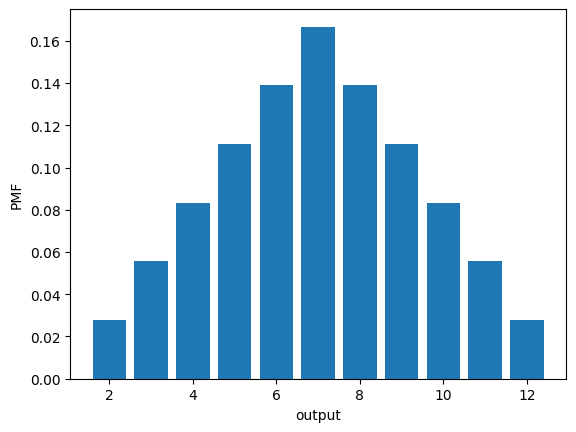

In [24]:
import matplotlib.pyplot as plt

plt.xlabel('output')
plt.ylabel('PMF')
twice.bar()
plt.show()

주사위를 나타내는 Pmf 객체의 순열을 사용한다면, 합의 분포를 다음과 같이 구할 수 있다.

In [25]:
def add_dist_seq(seq):
    """seq에서 값의 Pmf를 가져와서 계산함"""
    total = seq[0]
    for other in seq[1:]:
        total = total.add_dist(other)
    return total

In [26]:
dice = [die] * 3
thrice = add_dist_seq(dice)

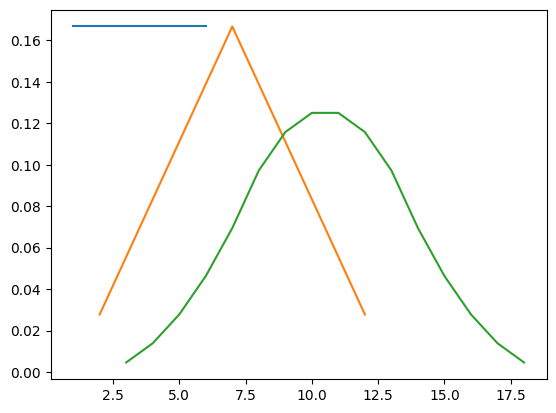

In [27]:
die.plot()
die.add_dist(die).plot()
thrice.plot()

plt.show()

## 6.5 글루텐 민감도

- 35명의 피험자 중 12명이 글루텐이 들어있는 밀가루를 먹는 동안 특정 증상이 발현되었다고 하면서 글루텐을 정확하게 식별했다.
- 다른 17명은 글루텐이 없는 밀가루에서도 어떤 증상이 나타났다고 했으며, 6명은 아무런 증상도 보이지 않았다. 
- 저자는 "이중 블라인드 글루텐 검사에서 피험자 중 1/3만이 특정 증상을 일으켰다"라고 결론을 내렸다.
- 이 결론은 좀 이상하다. 글루텐에 민감하지 않은 경우에도, 이 중 몇 명이 우연히 글루텐이 든 밀가루를 식별했을 수도 있다. 
- 그래서 다음과 같은 질문이 나올 수 있다. 이 데이터를 근거로, 몇 명의 피험자가 글루텐에 예민하고 몇 명은 단순히 추측했다고 할 수 있을까?
- 베이즈 정리를 사용해서 이 질문에 답할 수 있다. 하지만 몇 가지 모델링을 위해, 일단 문제를 파악해야 한다.
- 여기서는 이와 같은 가정을 한다.
  - 글루텐에 민감한 사람은 블라인드 검사에서 글루텐 밀가루를 정확히 식별할 확률이 95% 이다.
  - 글루텐에 민감하지 않은 사람이 우연히 글루텐 밀가루를 식별할 확률은 40%이다. (밀가루를 잘못 고르거나 식별하지 못할 확률이 60%이다.)
- 이 문제를 해결하는 데에는 다음과 같은 두 가지 단계를 거친다. 우선, 얼마나 많은 피험자가 글루텐에 민감한 지를 알고 있다고 가정하고, 데이터의 분포를 구하도록 하자. 
- 그리고 이 데이터의 가능도를 사용해서, 민감한 피험자의 수의 사후분포를 구하도록 하자.
- 첫 단계는 일반 연산 문제고, 두번째 단계는 역산의 문제이다.

## 6.6 일반연산문제

In [28]:
from scipy.stats import binom
from empiricaldist import Pmf

def make_binomial(n,p):
    """이항 Pmf를 생성"""
    ks =np.arange(n+1)
    ps = binom.pmf(ks,n,p) # 확률변수 0~ n 까지의 이항확률값
    return Pmf(ps,ks)

우선 35명 중 10 명이 글루텐에 민감하고, 나머지가 그렇지 않다고 하자.

In [29]:
n = 35
num_sensitive = 10
num_insensitive = n - num_sensitive

dist_sensitive = make_binomial(n=num_sensitive, p=0.95) # 민감한 사람이 글루텐을 민감하게 식별할 확률의 이항분포
dist_insensitive = make_binomial(n=num_insensitive, p=0.40) 

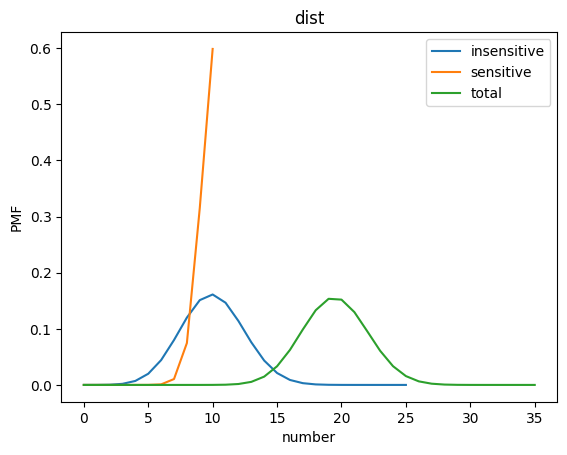

In [30]:
total_dist = dist_sensitive.add_dist(dist_insensitive)
dist_insensitive.plot(label="insensitive")
dist_sensitive.plot(label="sensitive")
total_dist.plot(label="total")

plt.xlabel("number")
plt.ylabel("PMF")
plt.title("dist")
plt.legend()
plt.show()

대부분의 민감한 피험자는 글루텐이 든 밀가루를 정확하게 분류했을 것이라 예상했다. 25명의 민감하지 않은 피험자 중에서는 10명 정도가 우연히 글루텐 밀가루를 제대로 분류했다고 예상했다. 

그래서 대략 20명이 글루텐 밀가루를 분류했다고 생각했다. 

주어진 민감한 피험자의 수를 사용해서 데이터의 분포를 구할 수 있다. 이는 일반 연산의 문제의 답을 구하는 일이다.


## 6.7 역산 문제

그럼 이제 역산 문제를 풀어보자. 주어진 데이터를 가지고 민감한 피험자의 수에 대한 사후분포를 구해보자. 

방법은 다음과 같다. num_sensitive의 가능한 값에 대해 반복문을 통해 데이터의 분포를 구해보자.

In [31]:
import pandas as pd

table = pd.DataFrame()
for num_sensitive in range(0,n+1):
    num_insensitive = n - num_sensitive
    dist_sensitive = make_binomial(n=num_sensitive, p=0.95) # 민감한 사람이 글루텐을 민감하게 식별할 확률의 이항분포
    dist_insensitive = make_binomial(n=num_insensitive, p=0.40) 
    total_dist = dist_sensitive.add_dist(dist_insensitive)
    table[num_sensitive] = total_dist
    

- 반복문에서는 num_sensitive 의 가능한 값을 나열한다. 
1. 각 값에 대해 정확한 분류의 총 횟수의 분포를 구하고, 결괏값을 데이터프레임의 행으로 저장한다. 
2. 다음 그래프는 데이터 프레임에 각각 저장된 서로 다른 num_sensitive의 값에 따른 결과값을 보여준다.

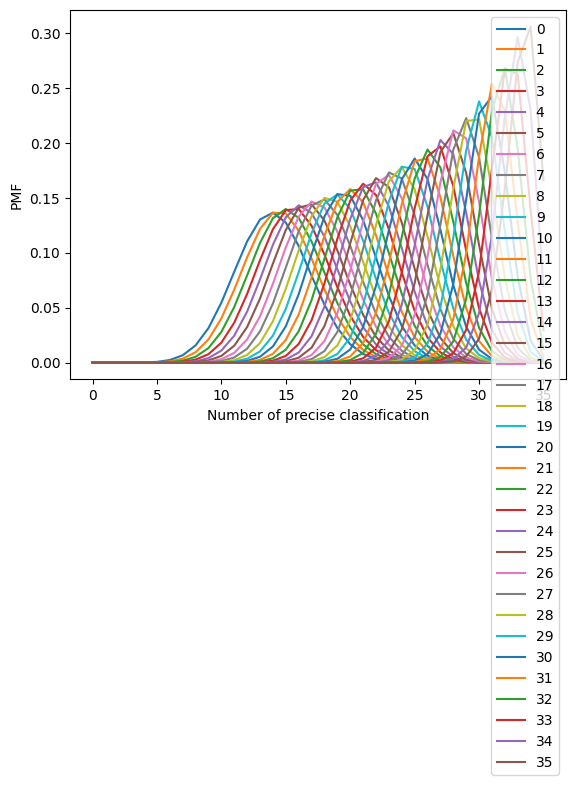

In [32]:
table.plot()
plt.xlabel("Number of precise classification")
plt.ylabel("PMF")
plt.show()

이제 이 테이블을 사용해서 데이터의 가능도를 구하자.

In [33]:
likelihood1 = table.loc[12] # 12명이 정확하게 제대로 분류했을 경우의 확률


- 12번 인덱스의 열은 각 num_sensitive의 가설값에 대한 12개가 제대로 분류된 경우의 확률값이 들어있다. 

- 그리고 이것이 우리가 베이지안 갱신에서 정확히 필요한 가능도(우도)이다. 여기서는 num_sensitive의 모든 값이 동일하게 발생 가능하다는 균등사전분포를 사용한다.

In [34]:
hypos = np.arange(n+1)
prior = Pmf(1,hypos)
posterior1 = prior * likelihood1
posterior1.normalize()


0.4754741648615131

비교를 위해 다른 가능한 결괏값인 20개가 제대로 분류된 경우의 사후분포도 같이 구해보도록 하자.

In [35]:
likelihood2 = table.loc[20]
posterior2 = prior * likelihood2
posterior2.normalize()

1.7818649765887378

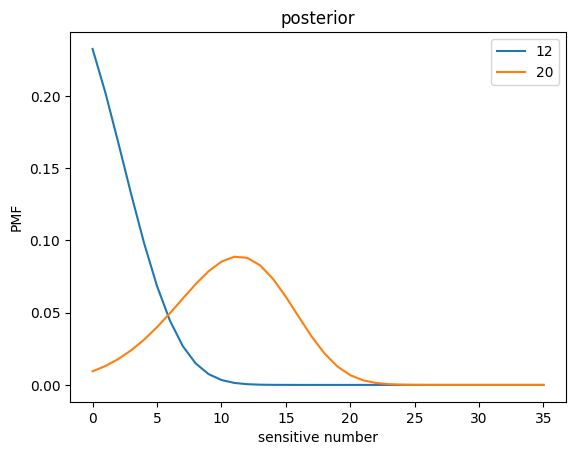

In [36]:
posterior1.plot(label = "12")
posterior2.plot(label = "20")
plt.xlabel("sensitive number")
plt.ylabel("PMF")
plt.title("posterior")
plt.legend()
plt.show()

12개가 정확한 경우, 어떤 피험자도 글루텐에 민감하지 않다는 것이 가장 가능성 있는 결론이 된다. 

20개가 정확한 경우, 11명~12명의 피험자가 민감하다는 것이 가장 가능성 있는 결론이 된다.

이제 연습문제를 풀어보며, 베이즈 규칙에 익숙해지자.

## 문제 6.2

베이즈 규칙을 사용해서 3장의 엘비스 문제를 풀어보자.

```
엘비스 프레슬리에게 쌍둥이 형제가 있었다. (태어날 때 사망)
엘비스 프레슬리가 일란성 쌍둥이일 가능성은 얼마인가?
```
1935년 쌍둥이의 2/3가량이 이란성이고 1/3이 일란성이었다. 이 문제에서 사전확률을 갱신할 때 사용할 수 있는 두 가지 정보가 있다.
- 첫째, 엘비스의 쌍둥이 역시 남자였고, 이는 2의 가능도비로 일란성일 확률이 높다.
- 또한 엘비스의 쌍둥이는 태어날 때 사망했으며, 이는 1.25의 가능비로 일란성일 확률이 높다.

In [37]:
prior_odds = odds(1/3)
likelihood_ratio_1 = 2
likelihood_ratio_2 = 1.25

posterior_odds = prior_odds * likelihood_ratio_1
posterior_odds *= likelihood_ratio_2
posterior_odds

1.2499999999999998

In [38]:
print(f'앨비스 프래슬리가 일란성 쌍둥이일 확률: {prob(posterior_odds)}')

앨비스 프래슬리가 일란성 쌍둥이일 확률: 0.5555555555555555


## 문제 6-3

다음은 글래스도어에 게시된 페이스북 인터뷰 질문이다.

```
시애틀에 가는 비행기를 타려고 한다고 하자. 그런데 우산을 가지고 가야 하는지 궁금해졌다. 시애틀에 사는 친구 중 임의의 3명에게 전화를 해서, 각각의 친구에게 비가 오는지를 물었다.
각 친구는 2/3 확률로 진실을 말하고, 1/3 확률로 거짓말을 해서 당신을 골탕먹일 것이다. 이 때 3명의 친구 모두 지금 비가 온다고 대답했다. 
그러면 지금 실제로 시애틀에 비가 올 확률은 얼마일까? 
```

- 베이즈 규칙을 사용해서 이 문제를 풀어보자.
- 사전확률로, 시애틀에 매시간 10%의 확률로 비가 온다고 가정하자. 
- 이 문제는 베이지안과 확률주의자의 확률 해석의 차이에 따라 다소 혼란이 있을 수 있다.

In [39]:
# seattle rain
prior_odds = odds(0.1)
likelihood_ratio_rain = (2/3)/(1/3)
posterior_odds *= likelihood_ratio_rain**3
print(f'실제로 시애틀에 비가 올 확률: {prob(posterior_odds)}')

실제로 시애틀에 비가 올 확률: 0.9090909090909091


## 문제 6-4

CDC에 의하면, 흡연자는 비흡연자에 비해 폐암에 걸릴 가능성이 25배 더 높다. 

또한 CDC에 의하면, 14%의 미국 성인은 흡연자다. 만약 누군가 폐암에 걸렸다는 이야기를 들었을 때, 이 사람이 흡연자일 가능성은 얼마인가?

In [40]:
prior_odds = odds(0.14) # 흡연자일 비율
likelihood_ratio_smoke = 25 # 폐암에 걸린 경우 흡연자에 비해 흡연자가 아닌 경우에 대한 우도비율
posterior_odds = prior_odds * likelihood_ratio_smoke
print(f'누군가가 폐암에 걸렸을 때, 이 사람이 흡연자일 확률: {prob(posterior_odds)}')

누군가가 폐암에 걸렸을 때, 이 사람이 흡연자일 확률: 0.8027522935779816


## 문제 6-5

- 던전앤드래곤에서, 고블린이 버틸 수 있는 데미지의 크기는 육면체 주사위 두 개를 던진 결과의 합만큼이다.
- 당신이 단검으로 가할 수 있는 데미지의 크기는 육면체 주사위를 하나 던진 값으로 결정된다. 
- 만약 당신이 가한 총 충격의 크기가 더 크다면 고블린이 패하고, 동일하다면 버틴다.
- 당신은 현재 고블린과 싸우는 중이고, 이미 3점의 충격을 가한 상태다. 다음 공격으로 고블린을 무찌를 확률은 얼마인가?

__Hint: Pmf.add_dist()를 활용하여 3과 같은 일정한 수를 Pmf에 더할 수 있고, Pmf.sub_dist()를 사용해서 남은 점수의 분포를 구할 수 있다.__

In [41]:
def make_die(sides):
    outcomes = np.arange(1,sides+1)
    die = Pmf(1/sides, outcomes)
    return die

d6 = make_die(6)
goblin = d6.add_dist(d6)
goblin_after_damage = goblin.sub_dist(3)


In [42]:
goblin

,probs
2,0.027778
3,0.055556
4,0.083333
5,0.111111
6,0.138889
7,0.166667
8,0.138889
9,0.111111
10,0.083333
11,0.055556


In [43]:
goblin_after_damage

,probs
-1,0.027778
0,0.055556
1,0.083333
2,0.111111
3,0.138889
4,0.166667
5,0.138889
6,0.111111
7,0.083333
8,0.055556


In [44]:
# -n ~ 0 = goblin death
# after 3 damage, goblin have to stay alive
goblin_after_damage[[-1,0]] = 0
goblin_after_damage.normalize()
goblin_after_damage

,probs
-1,0.000000
0,0.000000
1,0.090909
2,0.121212
3,0.151515
4,0.181818
5,0.151515
6,0.121212
7,0.090909
8,0.060606


In [45]:
goblin_left_HP = goblin_after_damage.sub_dist(d6)
goblin_left_HP

,probs
-7,0.000000
-6,0.000000
-5,0.015152
-4,0.035354
-3,0.060606
-2,0.090909
-1,0.116162
0,0.136364
1,0.136364
2,0.126263


In [46]:
print(f'goblin death probability: {goblin_left_HP.prob_le(0)}')

goblin death probability: 0.4545454545454545


이 문제에서 단순히 데미지 분포에 3을 더해서 계산하면 안 된다. 왜냐하면 고블린은 데미지 3을 받고 생존한 상태이기 때문이다. 

## 문제 6-6. 

육면체, 팔면체, 십이면체 주사위가 든 상자가 있다고 해보자. 이 중 임의로 주사위 하나를 꺼내서 두 번 던진 후 결과값을 곱했더니 12가 나왔다.
이 때 내가 팔면체 주사위를 골랐을 확률은 얼마인가?

__HINT: Pmf에는 두 Pmf 객체를 곱한 후 곱의 분포에 대한 Pmf를 반환하는 mul_dist()라는 함수가 있다.__

#### 접근 1

In [47]:
d6 = make_die(6)
d8 = make_die(8)
d12 = make_die(12)

d6_2 = d6.mul_dist(d6)
d8_2 = d8.mul_dist(d8)
d12_2 = d12.mul_dist(d12)

print(f'ans = {d8_2[12]/(d6_2[12]+d8_2[12]+d12_2[12])}') # uniform 할 경우에는 사실 prior이 posterior에 영향을 끼치지 않는다. prior이 사실 여기서는 1/3 인데, 위 아래 다 붙어서 수식에는 그냥 생략되었다.

ans = 0.2903225806451613


In [48]:
d6_2[12]

0.1111111111111111

In [49]:
d8_2[12]

0.0625

In [50]:
d12_2[12]

0.041666666666666664

#### 접근 2

In [51]:
hypos = [6,8,12]
prior = Pmf(1/3,hypos)

likelihood = []
for sides in hypos:
    die = make_die(sides)
    pmf = Pmf.mul_dist(die,die)
    likelihood.append(pmf[12])
likelihood

[0.1111111111111111, 0.0625, 0.041666666666666664]

In [52]:
posterior = prior * likelihood
print(posterior)
posterior.normalize()
print(posterior)

6     0.037037
8     0.020833
12    0.013889
dtype: float64
6     0.516129
8     0.290323
12    0.193548
dtype: float64


## 문제 6.7 

- Betrayal at House on the Hill 은 각기 다른 특성을 가진 캐릭터들이 귀신들린 집을 탐험하는 전략 보드 게임이다. 각 캐릭터의 특성에 따라 캐릭터는 다른 수의 주사위를 던진다.

- 예를 들어, 만약 지식이 필요한 임무를 수행하려면 롱펠로우 교수는 주사위 5개를 던지고, 마담 조스트라는 4개, 옥스 벨로스는 3개를 던진다.

- 각 주사위는 0,1,2 가 동일한 확률로 나온다. 

- 만약 임의로 고른 캐릭터가 3번의 지식임무를 수행하는데, 처음에는 총 3, 다음에는 총 4, 세번째 임무에서는 총 5가 나왔다면, 이 캐릭터는 누구일까?

In [53]:
d3 = make_die(3).sub_dist(1)

In [54]:
pmfs = {}
pmfs['Bellows'] = add_dist_seq([d3] * 3)
pmfs['Zostra'] = add_dist_seq([d3] * 4)
pmfs['Longfellow'] = add_dist_seq([d3] * 5)
pmfs

{'Bellows': 0    0.037037
 1    0.111111
 2    0.222222
 3    0.259259
 4    0.222222
 5    0.111111
 6    0.037037
 dtype: float64,
 'Zostra': 0    0.012346
 1    0.049383
 2    0.123457
 3    0.197531
 4    0.234568
 5    0.197531
 6    0.123457
 7    0.049383
 8    0.012346
 dtype: float64,
 'Longfellow': 0     0.004115
 1     0.020576
 2     0.061728
 3     0.123457
 4     0.185185
 5     0.209877
 6     0.185185
 7     0.123457
 8     0.061728
 9     0.020576
 10    0.004115
 dtype: float64}

In [55]:
hypos = pmfs.keys()
hypos

dict_keys(['Bellows', 'Zostra', 'Longfellow'])

In [56]:
prior = Pmf(1/3, hypos)
prior

,probs
Bellows,0.333333
Zostra,0.333333
Longfellow,0.333333


In [57]:
# Solution

likelihood = prior.copy()

for hypo in hypos:
    likelihood[hypo] = pmfs[hypo]([3,4,5]).prod() # 배열 내 각 원소들을 곱하는 메서드, 동시 사건

likelihood

,probs
Bellows,0.006401
Zostra,0.009152
Longfellow,0.004798


In [58]:
posterior = prior * likelihood
posterior.normalize()
posterior

,probs
Bellows,0.314534
Zostra,0.449704
Longfellow,0.235762


## 문제 6.8

- 미국 의회에는 538명이 속해있다. 우리가 이 사람들의 투자 포트폴리오를 감사하게 되었는데, 이 중 312명이 시장 평균 이상의 수익을 거뒀다. 
- 이 때 의회에서 정직한 사람은 시장 평균 이상 수익이 날 확률이 50%이고, 내부 정보를 활용해서 거래하는 정직하지 않은 사람은 90% 이상의 확률로 평균 이상의 수익을 거둔다 하자.
- 이 때 의회에서 정직한 사람은 몇 명인가?

In [ ]:
from scipy.stats import binom
from empiricaldist import Pmf

def make_binomial(n,p):
    """이항 Pmf를 생성"""
    ks =np.arange(n+1)
    ps = binom.pmf(ks,n,p) # 확률변수 0~ n 까지의 이항확률값. n번 시행했을 때 ks 라는 시리즈 데이터에 대해 이항분포에서 각 k가 성공할 확률
    return Pmf(ps,ks)

잘 모르겠을 때는 문제를 먼저 정의해보자. 

1. 문제가 궁금한 것 : 312명이 이득을 본 사건이 발생했을 때 정직한 사람의 수(확률)
2. 그렇다면 구해야하는 것: 
   1. 베이즈 정리, $ P(H|D) = \frac{P(H)*P(D|H)}{P(D)}$
   2. $P(H|D)$ = 312명이 이득을 본 사건이 발생했을 때 정직한 사람의 수(확률)
   3. $P(H)$ = 정직한 사람의 사전확률
   4. $P(D|H)$ = 정직한 사람 중에 이득을 본 사람의 확률
   5. $P(D)$ = 이득을 볼 확률

In [70]:
# Solution

# P(D|H) 구하기

n = 538
ns = range(n+1)
table = pd.DataFrame(index = ns, columns = ns, dtype = float)

# 정직한 사람이 n명일 때 (P(D|H_{n})) 이득을 본 사람의 수의 분포
for n_honest in ns:
    n_dishonest = n - n_honest
    dist_honest = make_binomial(n_honest, 0.5)
    dist_dishonest = make_binomial(n_dishonest, 0.9)
    dist_total = dist_honest.add_dist(dist_dishonest)
    table[n_honest] = dist_total
table.shape

(539, 539)

In [65]:
data = 312
likelihood = table.loc[data]

# 이득을 본 사람의 수
hypos = np.arange(n+1)
# 의회 사람 중 n 명이 정직한 사람일 사전확률
prior = Pmf(1, hypos)
prior.normalize()
# table = 정직한 사람이 n명일 때 (P(D|H_{n})) 이득을 본 사람의 수의 확률분포표, likelihood = table[312], 정직한 사람들 중 312명이 이득을 볼 사건이 발생할 확률
posterior = prior * likelihood
posterior.normalize()
posterior.mean()

431.48821145019934

<Axes: >

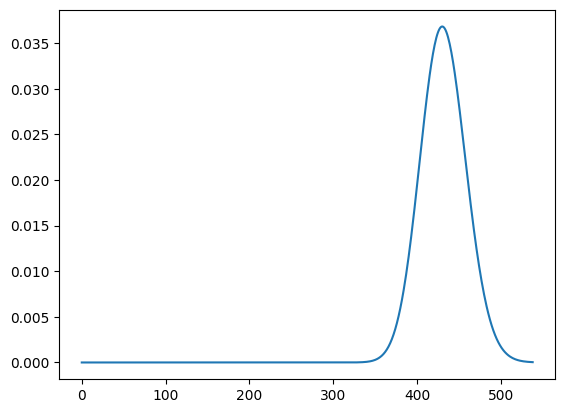

In [69]:
likelihood.plot()

<Axes: >

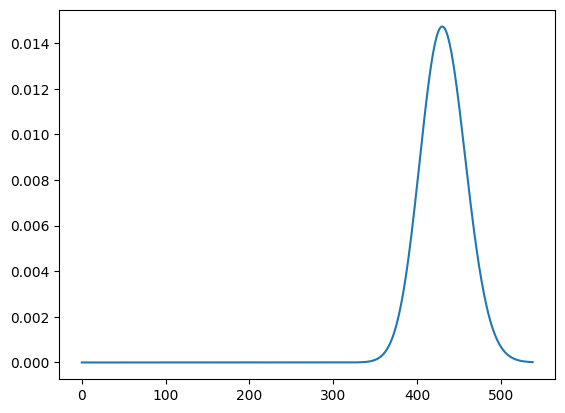

In [67]:
posterior.plot()

#### 이 문제가 직관적으로 와닿지 않는다면, 아래와 같이 문제를 단순화하여 시각화해보자.

- 전체 인원을 5명으로 하고, 이득을 본 인원을 3명으로 해보자.  

잘 모르겠을 때는 문제를 먼저 정의해보자. 

1. 문제가 궁금한 것 : 3명이 이득을 본 사건이 발생했을 때 정직한 사람의 수(확률)
2. 그렇다면 구해야하는 것: 
   1. 베이즈 정리, $ P(H|D) = \frac{P(H)*P(D|H)}{P(D)}$
   2. $P(H|D)$ = 3명이 이득을 본 사건이 발생했을 때 정직한 사람의 수(확률)
   3. $P(H)$ = 정직한 사람의 사전확률
   4. $P(D|H)$ = 정직한 사람 중에 이득을 본 사람의 확률
   5. $P(D)$ = 이득을 볼 확률

In [71]:
# P(D|H) 구하기
# 일단 확률분포를 정의
n = 5
ns = range(n+1)
table = pd.DataFrame(index = ns, columns = ns, dtype = float)

# 정직한 사람이 n명일 때 (P(D|H_{n})) 이득을 본 사람의 수의 분포
for n_honest in ns: # 0, 1, 2, 3, 4, 5
    n_dishonest = n - n_honest
    dist_honest = make_binomial(n_honest, 0.5)
    dist_dishonest = make_binomial(n_dishonest, 0.9)
    dist_total = dist_honest.add_dist(dist_dishonest)
    table[n_honest] = dist_total
print(table)

         0        1        2        3        4        5
0  0.00001  0.00005  0.00025  0.00125  0.00625  0.03125
1  0.00045  0.00185  0.00725  0.02625  0.08125  0.15625
2  0.00810  0.02610  0.07450  0.17250  0.26250  0.31250
3  0.07290  0.17010  0.31050  0.37250  0.36250  0.31250
4  0.32805  0.47385  0.42525  0.32625  0.23125  0.15625
5  0.59049  0.32805  0.18225  0.10125  0.05625  0.03125


In [77]:
print(make_binomial(3,0.5))
print(make_binomial(2,0.9))
print(make_binomial(3,0.5).add_dist(make_binomial(2,0.9))) 

"""
0이 일어나려면 (0,0) 밖에 없으므로 (0.125 * 0.01) = 0.00125
1이 일어나려면 (0,1), (1,0) 사건. (0.125 * 0.18) + (0.375 * 0.01) = 0.02625
...
"""

0    0.125
1    0.375
2    0.375
3    0.125
dtype: float64
0    0.01
1    0.18
2    0.81
dtype: float64
0    0.00125
1    0.02625
2    0.17250
3    0.37250
4    0.32625
5    0.10125
dtype: float64


In [72]:
data = 3
likelihood = table.loc[data]
likelihood

0    0.0729
1    0.1701
2    0.3105
3    0.3725
4    0.3625
5    0.3125
Name: 3, dtype: float64

In [73]:
# 정직한 사람의 수
hypos = np.arange(n+1)
# 의회 사람 중 n 명이 정직한 사람일 사전확률
prior = Pmf(1, hypos)
prior.normalize()
# table = 정직한 사람이 n명일 때 (P(D|H_{n})) 이득을 본 사람의 수의 도합 확률분포표(P(D|H)), likelihood = table[3], 정직한 사람들 중 3명이 이득을 볼 사건이 발생할 확률
posterior = prior * likelihood
posterior.normalize()

0.2668333333333333

<Axes: >

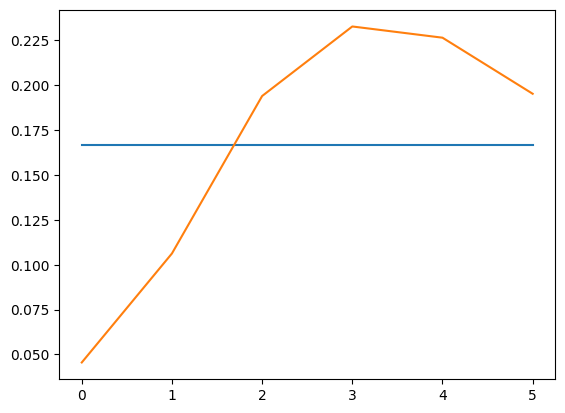

In [74]:
prior.plot(label = 'prior')
posterior.plot(label = 'posterior')

In [75]:
posterior.mean()

3.0737663960024983